# 국민건강보험공단_건강검진정보
해당 데이터셋을 활용하여 클러스터링을 함. 데이터 용량이 너무 많아 5000개로 처리하여 데이터를 사용하였음 https://www.data.go.kr/data/15007122/fileData.do


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df = pd.read_csv('c5.csv')


In [35]:
print(df.head())
print(df.shape)

   기준년도  가입자일련번호  시도코드  성별  연령대코드(5세단위)  신장(5cm단위)  체중(5kg단위)  허리둘레  시력(좌)  \
0  2022   702763    41   2           14        160         75  89.0    1.0   
1  2022   765435    41   2            9        150         45  68.0    1.0   
2  2022   343621    41   2           13        150         60  78.8    1.0   
3  2022  3393534    41   2            6        160         50  69.0    1.0   
4  2022  1716951    41   2            7        160         55  75.0    1.0   

   시력(우)  ...  요단백  혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)  감마지티피  흡연상태  음주여부  \
0    1.0  ...  1.0      0.8        25.0        20.0   15.0   1.0   0.0   
1    1.0  ...  1.0      0.8        19.0        10.0    7.0   1.0   1.0   
2    1.0  ...  1.0      0.8        17.0        15.0   15.0   1.0   1.0   
3    1.0  ...  1.0      0.8        25.0        16.0   13.0   1.0   1.0   
4    1.0  ...  1.0      0.8        22.0        22.0   15.0   1.0   1.0   

   구강검진수검여부  치아우식증유무  치석  
0         0      NaN NaN  
1         0      NaN NaN  
2    

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         5000 non-null   int64  
 1   가입자일련번호      5000 non-null   int64  
 2   시도코드         5000 non-null   int64  
 3   성별           5000 non-null   int64  
 4   연령대코드(5세단위)  5000 non-null   int64  
 5   신장(5cm단위)    5000 non-null   int64  
 6   체중(5kg단위)    5000 non-null   int64  
 7   허리둘레         5000 non-null   float64
 8   시력(좌)        5000 non-null   float64
 9   시력(우)        5000 non-null   float64
 10  청력(좌)        5000 non-null   float64
 11  청력(우)        5000 non-null   float64
 12  수축기혈압        5000 non-null   float64
 13  이완기혈압        5000 non-null   float64
 14  식전혈당(공복혈당)   5000 non-null   float64
 15  총콜레스테롤       0 non-null      float64
 16  트리글리세라이드     0 non-null      float64
 17  HDL콜레스테롤     0 non-null      float64
 18  LDL콜레스테롤     0 non-null      float64
 19  혈색소   

In [37]:
# 결측치 확인
print(df.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별                0
연령대코드(5세단위)       0
신장(5cm단위)         0
체중(5kg단위)         0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압             0
이완기혈압             0
식전혈당(공복혈당)        0
총콜레스테롤         5000
트리글리세라이드       5000
HDL콜레스테롤       5000
LDL콜레스테롤       5000
혈색소               0
요단백               0
혈청크레아티닌           0
혈청지오티(AST)        0
혈청지피티(ALT)        0
감마지티피             0
흡연상태              0
음주여부              0
구강검진수검여부          0
치아우식증유무        5000
치석             5000
dtype: int64


In [38]:
# 결측치가 있는 열을 제거
df.dropna(axis=1, inplace=True)

In [39]:
# 다시 결측치 확인
print(df.isnull().sum())

기준년도           0
가입자일련번호        0
시도코드           0
성별             0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
혈색소            0
요단백            0
혈청크레아티닌        0
혈청지오티(AST)     0
혈청지피티(ALT)     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
dtype: int64


In [40]:
# 데이터 정규화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['신장(5cm단위)', '체중(5kg단위)', '허리둘레']])  # 클러스터링 대상 변수 선택 및 조정


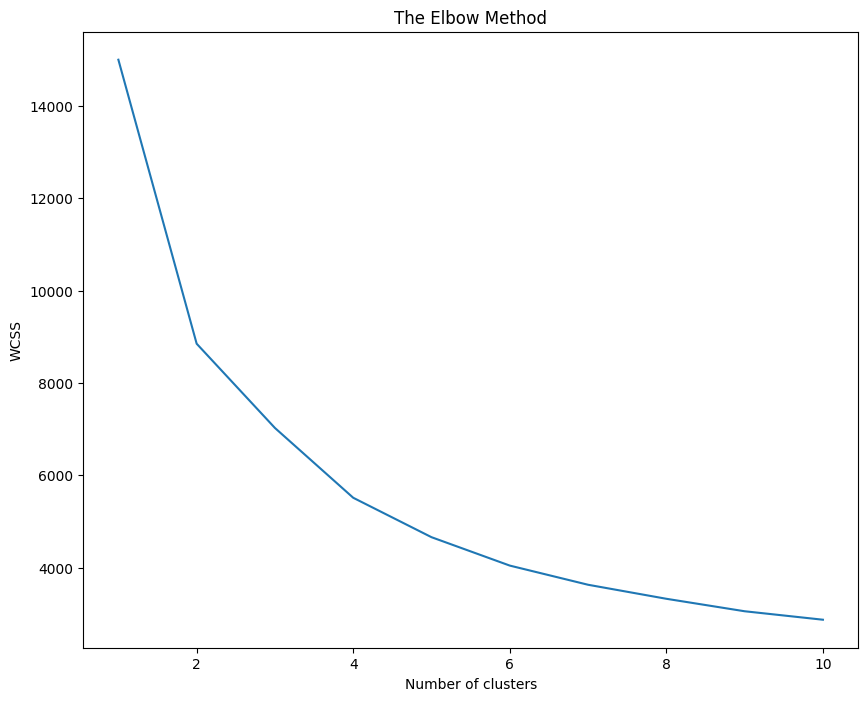

In [41]:
# 엘보우 방법을 사용한 최적의 클러스터 수 찾기
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


위의 그래프에서는 엘보우 지점을 2~4 정도라고 할수있다. 그래서 3을 선택했다. 이는 나름 적절한 k cluster 수를 의미한다.

In [42]:
# 클러스터링 수행
k_optimal = 3  # 엘보우 그래프에서 얻은 최적의 클러스터 수
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_scaled)

# 결과를 원본 데이터프레임에 추가
df['Cluster'] = cluster_labels


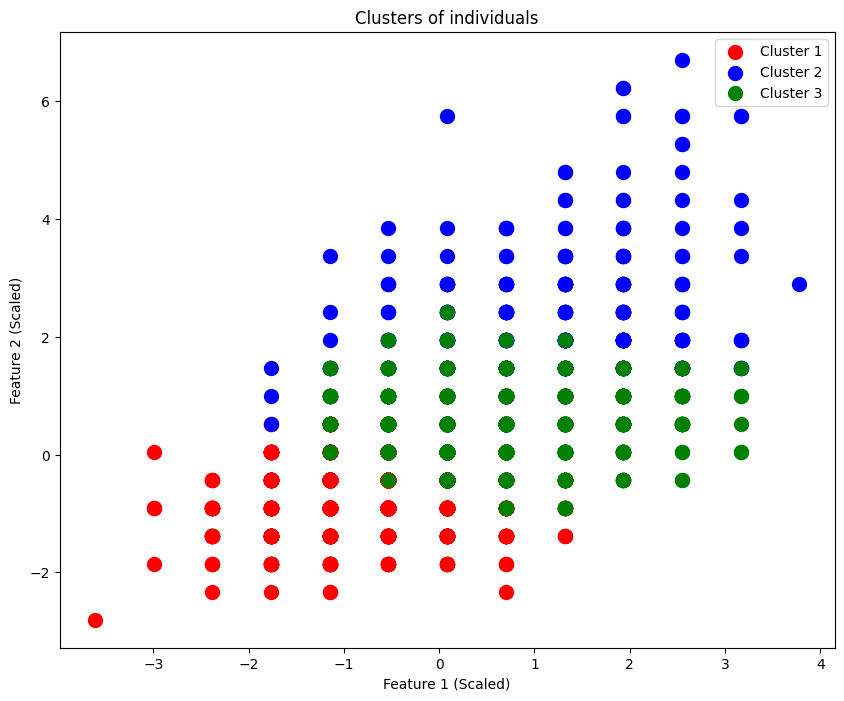

In [43]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[cluster_labels == 0, 0], df_scaled[cluster_labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[cluster_labels == 1, 0], df_scaled[cluster_labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[cluster_labels == 2, 0], df_scaled[cluster_labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of individuals')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()



총 3가지의 클러스터 가 linear하게 잘 나누어 졌다. 특징이 둘다 낮은 경우는 빨간, 높은경우는 파랑, 그들의 중간인 경우는 추록색으로 표현이 되었다. 이후 이 cluster들을 활용하여 분석을 수행한다.

In [44]:
# 클러스터의 특성 분석
print(df.groupby('Cluster').mean())

           기준년도       가입자일련번호  시도코드        성별  연령대코드(5세단위)   신장(5cm단위)  \
Cluster                                                                  
0        2022.0  2.558038e+06  41.0  1.956907    10.981916  154.109273   
1        2022.0  2.491822e+06  41.0  1.324211     9.602105  167.884211   
2        2022.0  2.476188e+06  41.0  1.602285     9.695742  164.231568   

         체중(5kg단위)       허리둘레     시력(좌)     시력(우)  ...  식전혈당(공복혈당)        혈색소  \
Cluster                                            ...                          
0        52.545210  73.858061  0.925394  0.914852  ...   97.185456  13.355560   
1        80.621053  92.466947  1.004211  1.012000  ...  104.637895  14.772632   
2        63.655244  78.725182  1.005711  0.987695  ...   96.786085  13.991848   

         요단백  혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)      감마지티피  흡연상태      음주여부  \
Cluster                                                                    
0        1.0      0.8   24.381301   20.402847  22.570604   1.0  0.52635

In [45]:
# Cell 10: 실루엣 점수 계산
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print('Silhouette Score: {:.4f}'.format(silhouette_avg))


Silhouette Score: 0.3100


문제 정의: 건강 위험군 식별을 통한 타깃 건강 개선 프로그램 설계
이 분석의 주된 목적은 건강 데이터를 클러스터링하여 비슷한 건강 특성을 가진 그룹을 식별하고, 각 그룹의 특정 건강 위험을 평가하는 것입니다. 이를 통해 맞춤형 건강 개선 프로그램을 설계하여 개인의 건강을 증진하고, 의료 비용을 절감할 수 있습니다. 예상되는 결과는 다음과 같습니다. 각 클러스터를 대상으로 특정 건강 문제가 집중되어 있는지 식별합니다. 식별된 건강 위험군에 따라 타깃 건강 개선 프로그램(예: 운동 캠페인, 영양 상담, 정기적인 건강 검진)을 개발합니다. 프로그램 효과성 평가를 위해 클러스터별 건강 변화를 추적 관찰합니다.


데이터셋 구조:
* 기준년도: 검진을 받은 연도
* 가입자일련번호: 개인을 식별할 수 있는 번호
* 시도코드: 개인의 거주 지역 코드
* 성별, 연령대코드(5세 단위): 개인의 기본 인구 통계 정보
* 신장(5cm 단위), 체중(5kg 단위), 허리둘레: 체형 관련 정보
* 시력(좌, 우), 청력(좌, 우): 시각 및 청각 기능
* 혈압(수축기, 이완기), 식전혈당(공복혈당): 심혈관 및 대사 건강 지표
* 혈액 관련 지표(총콜레스테롤, 트리글리세라이드 등): 내부 건강 상태
* 흡연상태, 음주여부: 생활 습관 정보


데이터의 유용성:
이 데이터셋은 개인의 건강 상태와 생활 습관에 대한 광범위한 정보를 포함하고 있어, 다양한 건강 위험 요소를 파악할 수 있습니다. 클러스터링을 통해 유사한 건강 프로파일을 가진 그룹을 식별할 수 있으며, 이를 바탕으로 특정 건강 위험이 높은 그룹에 맞춤형 개입을 설계하고 실행할 수 있습니다. 또한, 지역 코드를 통해 지역별 건강 특성과 필요한 의료 자원의 분포를 파악할 수 있어, 지역 건강 정책의 효과적인 설계와 실행에 도움을 줄 수 있습니다.


클러스터 특성 요약:
* 클러스터 0: 이 그룹은 평균 신장이 154.1cm, 체중은 52.5kg이며, 허리둘레는 약 73.9cm입니다. 이 그룹은 비교적 작은 체형을 가진 사람들로 구성되어 있으며, 식전혈당과 감마지티피 수치가 비교적 낮은 편입니다.
* 클러스터 1: 이 그룹은 평균 신장이 167.9cm, 체중은 80.6kg으로, 허리둘레는 92.5cm입니다. 이는 상대적으로 큰 체형의 사람들로 구성되어 있으며, 혈청지피티(ALT), 감마지티피 수치가 높고, 식전혈당 또한 다른 그룹에 비해 높습니다. 이는 대사 증후군이나 심혈관 질환 위험이 더 클 수 있음을 시사합니다.
* 클러스터 2: 평균 신장이 164.2cm, 체중은 63.7kg, 허리둘레는 약 78.7cm입니다. 이 그룹은 중간 크기의 체형을 가지고 있으며, 혈액 검사 지표가 클러스터 0과 비슷하거나 약간 높은 경향을 보입니다.


클러스터의 특성에 따른 해석
각 클러스터는 체형과 건강 지표에서 뚜렷한 차이를 보이며, 이는 다음과 같은 의료적, 건강적 개입이나 조치를 고려할 때 유용할 수 있습니다:
클러스터 0: 일반적으로 체형이 작고, 건강 지표가 비교적 양호한 그룹으로, 주요 건강 문제가 없는 것으로 보입니다.
클러스터 1: 체중과 허리둘레가 큰 이 그룹은 심혈관 질환 위험이 높을 수 있으므로, 체중 관리와 건강 검진을 자주 하는 것이 좋습니다.
클러스터 2: 이 그룹은 중간 정도의 체형을 가지고 있으며, 일부 건강 지표에서 경미한 위험이 있을 수 있습니다. 균형 잡힌 식단과 규칙적인 운동을 권장합니다.


실루엣 점수 해석
실루엣 점수는 클러스터 내 데이터 포인트가 얼마나 잘 뭉쳐 있는지, 그리고 클러스터들이 서로 얼마나 잘 분리되어 있는지를 나타내는 지표입니다. 점수 범위는 -1에서 1까지이며, 1에 가까울수록 클러스터링 성능이 좋다고 평가할 수 있습니다. 0.31의 실루엣 점수는 클러스터링이 어느 정도 의미 있게 이루어졌지만, 최적은 아님을 의미합니다.

